In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# import the required packages.
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
import sys  
import os
cwd = os.getcwd()
import sys  
sys.path.append(cwd+"/data_load/")
sys.path.append(cwd+"/models/")
print cwd

from load_datasets import prepare_usps_mlfetch,prepare_fake_news_data,prepare_cifar_10_data,prepare_spam_vs_ham_data
##  Models implemented 
from sklearn_OCSVM_model import func_getDecision_Scores_sklearn_OCSVM
from sklearn_OCSVM_explicit_model import func_getDecision_Scores_sklearn_OCSVM_explicit
from OneClass_NN_model import func_getDecision_Scores_One_Class_NN_explicit
from tf_OneClass_NN_model import func_getDecision_Scores_tf_OneClass_NN
from tflearn_OneClass_NN_model import func_getDecision_Scores_tflearn_OneClass_NN


### PLotting functions for the methods implemented
from plot_scores import plot_decision_scores
from sklearn_OCSVM_explicit_plot_scores import plot_decision_scores_sklearn_OCSVM_explicit
from OneClass_NN_model_plot_scores import plot_decision_scores_One_Class_NN_explicit
from tf_OneClass_NN_model_plot_scores import plot_decision_scores_tf_One_Class_NN
from tflearn_OneClass_NN_model_plot_scores import plot_decision_scores_tflearn_OneClass_NN

/Users/raghav/Documents/Uni/AAAI_2017/one_class_nn


Couldn't import dot_parser, loading of dot files will not be possible.


importing usps from pickle file .....


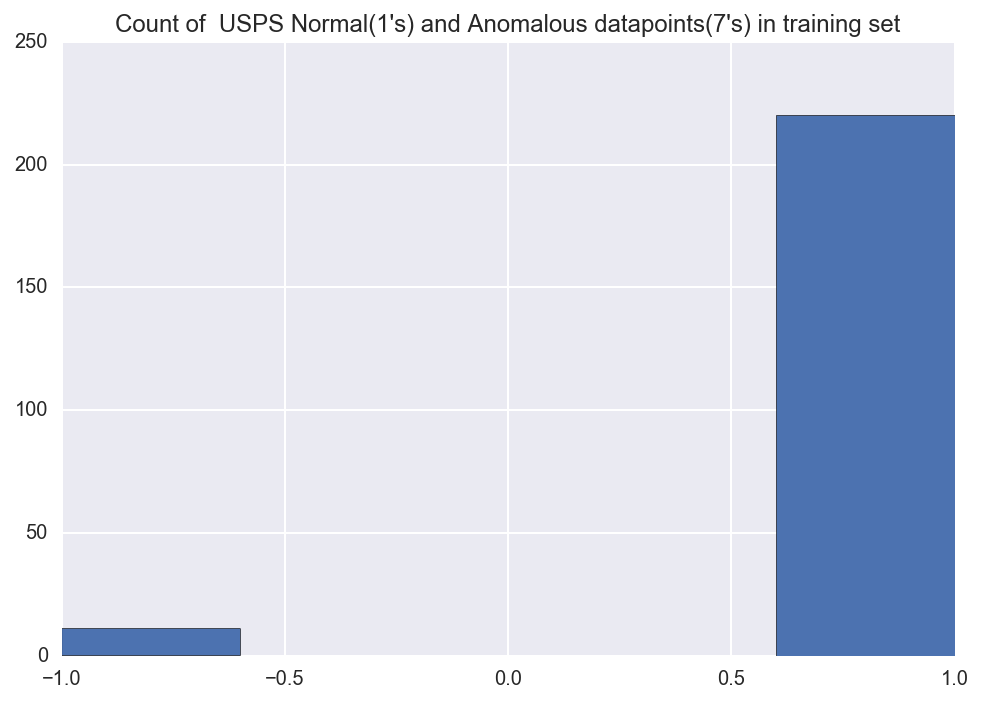

Hate Class Shape (246, 2)
Fake Class shape (19, 2)


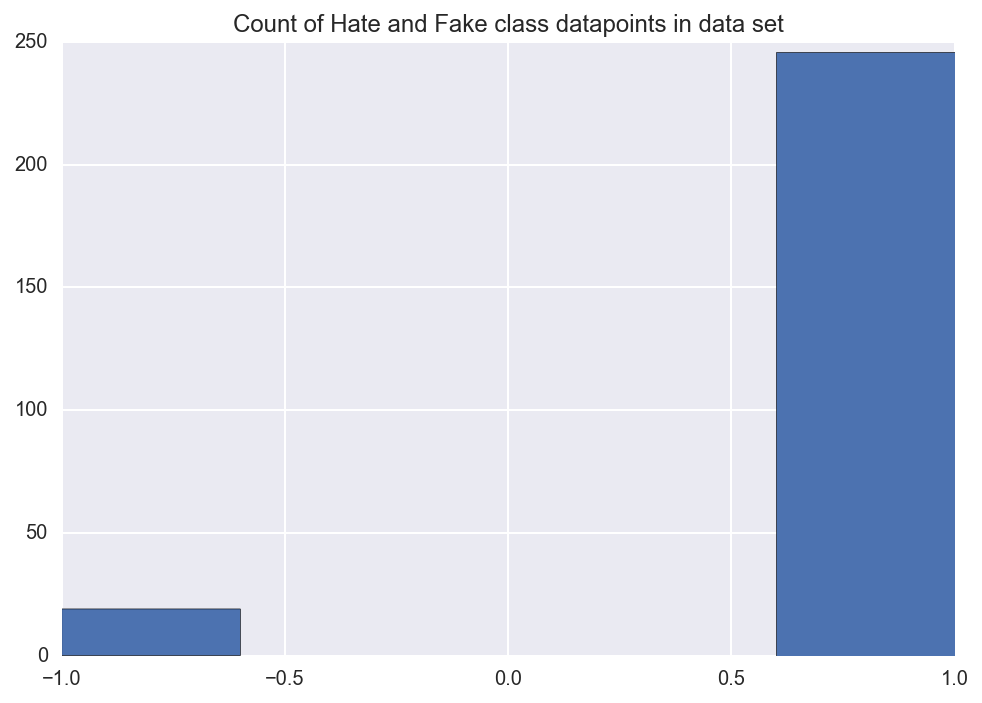

(246, 17977)
(19, 17977)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
(246, 179)
(19, 179)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
Ham Class Shape (220, 5)
Spam Class shape (11, 5)
(231,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


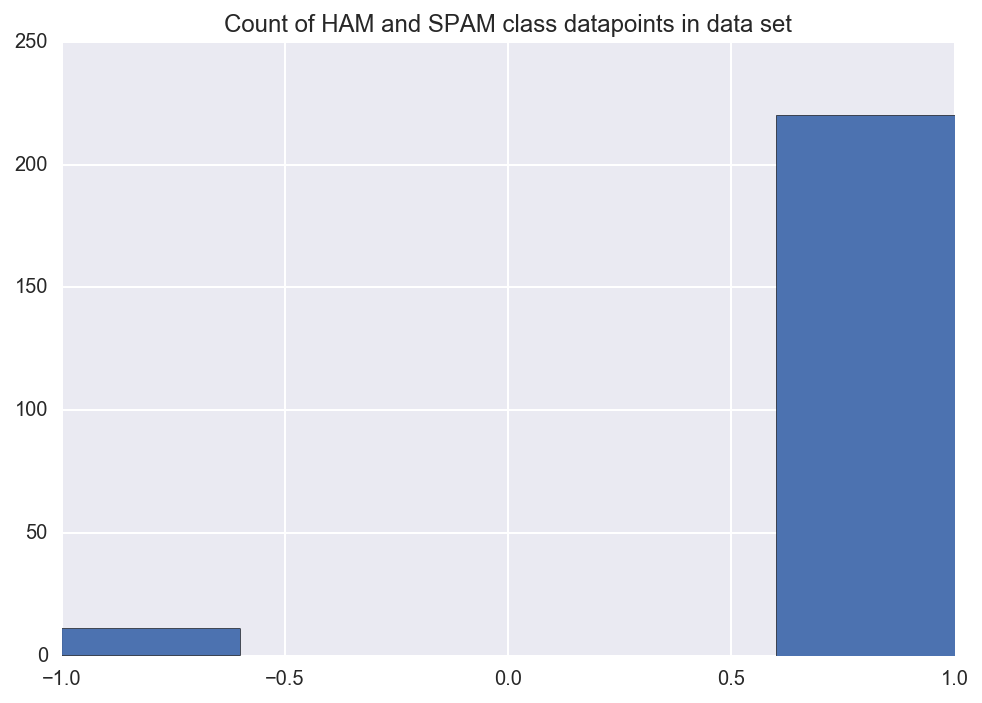

Data Train Shape (220, 3072)
Data Test Shape (11, 3072)
Label Train Shape (220,)
Label Test Shape (11,)


In [2]:
## Import all the datasets and prepare the Training and test set for respective datasets
[Xtrue_usps,Xlabels_usps] = prepare_usps_mlfetch()

### Prepare training and test set for respective datasets
# USPS Train and Test Data
data_train_usps    = Xtrue_usps[0:220]
data_test_usps     = Xtrue_usps [220:231]
targets_train_usps = Xlabels_usps[0:220]
targets_test_usps  = Xlabels_usps[220:231]

# Fake News Train and Test Data
[data_train_fake_news,targets_train_fake_news,  data_test_fake_news, targets_test_fake_news] =  prepare_fake_news_data()

# Spam Vs Ham Train and Test Data
[data_train_spam_vs_ham,targets_train_spam_vs_ham,  data_test_spam_vs_ham, targets_test_spam_vs_ham] =  prepare_spam_vs_ham_data()

# CIFAR-10 Train and Test Data # ROOT contains 
[data_train_cifar_10,targets_train_cifar_10,  data_test_cifar_10, targets_test_cifar_10] =  prepare_cifar_10_data()



# Create list of Training and Testing Datasets and labels  consisting of various datasets to run the methods in loop.
train_data_list = [data_train_usps,data_train_fake_news,data_train_spam_vs_ham,data_train_cifar_10]
test_data_list = [data_test_usps,data_test_fake_news,data_test_spam_vs_ham,data_test_cifar_10]

train_labels_list = [targets_train_usps,targets_train_fake_news,targets_train_spam_vs_ham,targets_train_cifar_10]
test_labels_list  = [targets_test_usps,targets_test_fake_news,targets_test_spam_vs_ham,targets_test_cifar_10]



## Collect the results in dataframes corresponding to method and data and activation
colNames = ["sklearn-OCSVM-Linear-Train","sklearn-OCSVM-RBF-Train","sklearn-OCSVM-Linear-Test","sklearn-OCSVM-RBF-Test","sklearn-explicit-Linear-Train","sklearn-explicit-Sigmoid-Train","sklearn-explicit-Linear-Test","sklearn-explicit-Sigmoid-Test","tf-Linear-Train","tf-Sigmoid-Train","tf-Linear-Test","tf-Sigmoid-Test","tfLearn-Linear-Train","tfLearn-Sigmoid-Train","tfLearn-Linear-Test","tfLearn-Sigmoid-Test"]
# Create empty dataframe with given column names.
df_usps_scores = pd.DataFrame(columns=colNames)
df_fake_news_scores = pd.DataFrame(columns=colNames)
df_spam_vs_ham_scores = pd.DataFrame(columns=colNames)
df_cifar_10_scores = pd.DataFrame(columns=colNames)



## Sklearn-OCSVM  Model

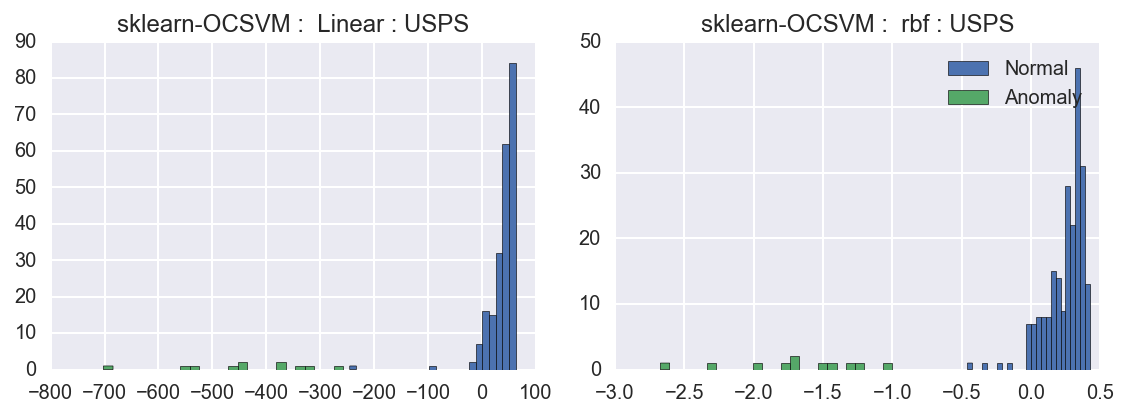

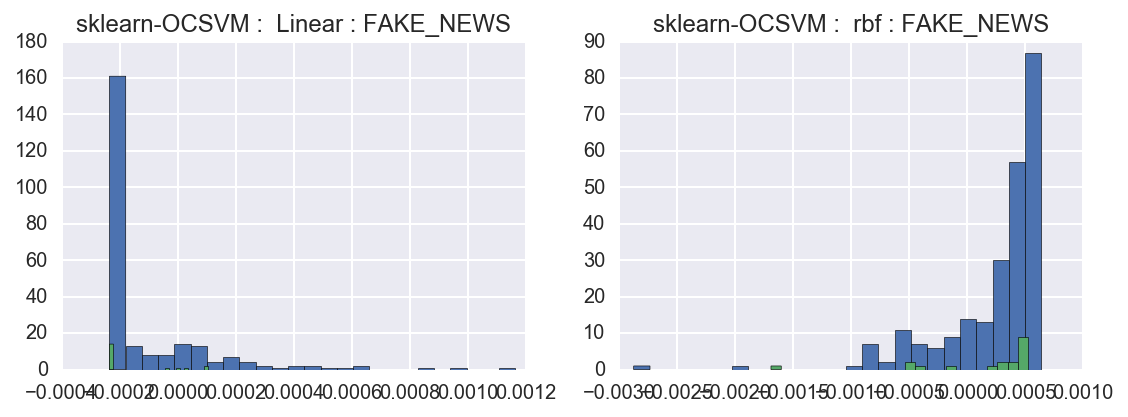

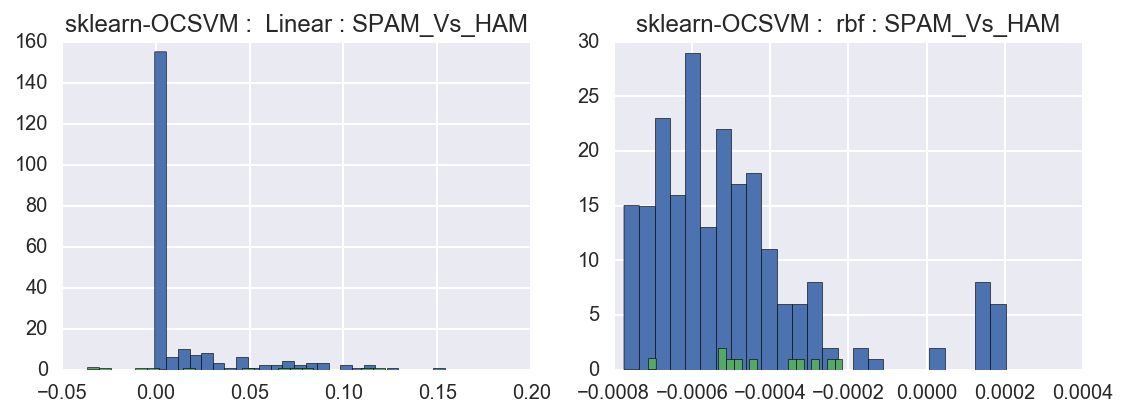

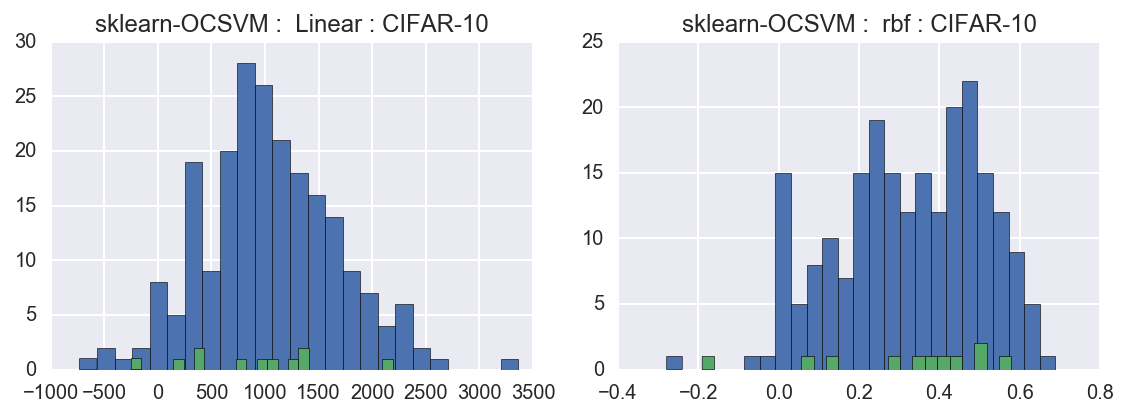

In [3]:
##  Models implemented 
from sklearn_OCSVM_model import func_getDecision_Scores_sklearn_OCSVM


### PLotting functions for the methods implemented
from plot_scores import plot_decision_scores


## Loop over the datasets , method , activations and collect the results in respective dataframes
datasets = ["USPS","FAKE_NEWS","SPAM_Vs_HAM","CIFAR-10"]
model = ["sklearn-OCSVM","sklearn-OCSVM-explicit","tensorflow","tflearn"]
activations = ["Linear","Sigmoid"]
methods = ["Linear","rbf"]
dataType = ["Train","Test"]

for data in range(0,len(datasets)):
            [df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores] = func_getDecision_Scores_sklearn_OCSVM(datasets[data],train_data_list[data],test_data_list[data])
            plot_decision_scores("sklearn-OCSVM",datasets[data],df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores)

## Sklearn-OCSVM_explicit Model

Gradient error: 5.65966004199e-06
Gradient error: 5.65966004199e-06
Gradient error: 1.25667666123e-05
Gradient error: 1.25667666123e-05
Gradient error: 0.000708777481821
Gradient error: 0.000708777481821


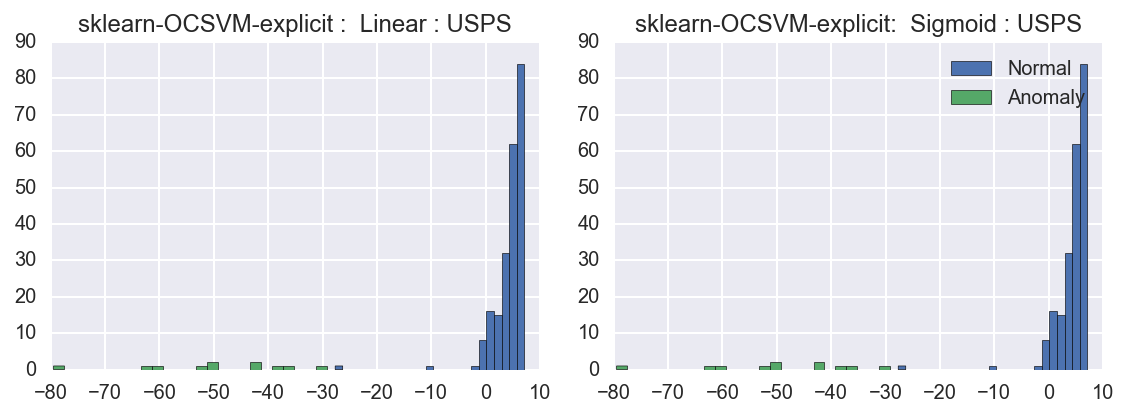

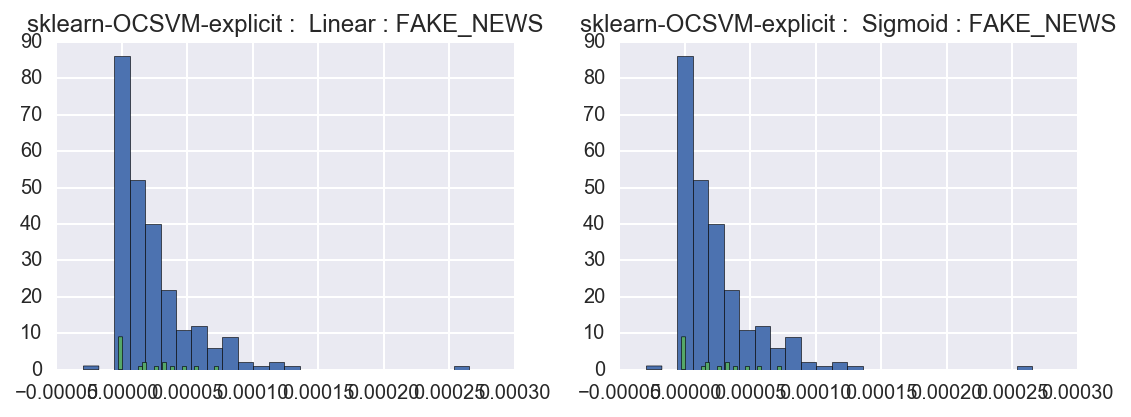

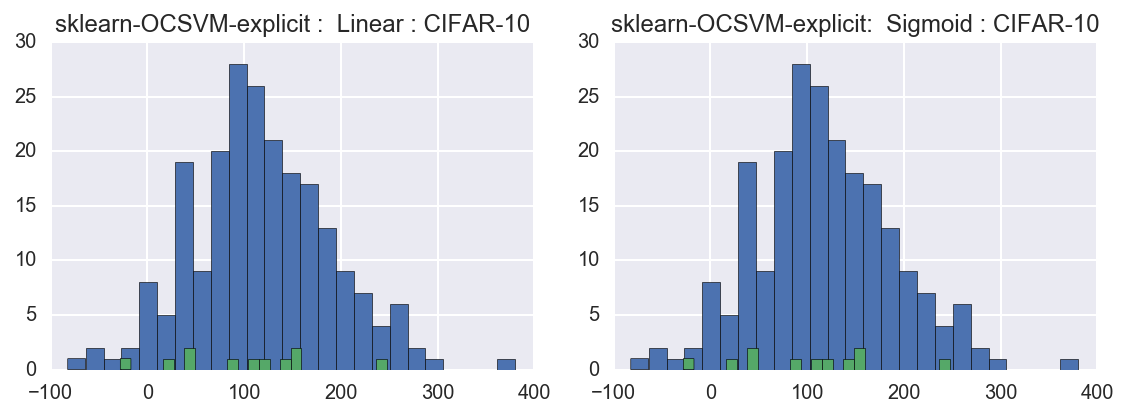

In [4]:
##  Models implemented 
from sklearn_OCSVM_explicit_model import func_getDecision_Scores_sklearn_OCSVM_explicit

### PLotting functions for the methods implemented
from sklearn_OCSVM_explicit_plot_scores import plot_decision_scores_sklearn_OCSVM_explicit

datasets = ["USPS","FAKE_NEWS","SPAM_Vs_HAM","CIFAR-10"]
model = ["sklearn-OCSVM","sklearn-OCSVM-explicit","tensorflow","tflearn"]
activations = ["Linear","Sigmoid"]
methods = ["Linear","rbf"]
dataType = ["Train","Test"]

for data in range(0,len(datasets)):
        [df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores] = func_getDecision_Scores_sklearn_OCSVM_explicit(datasets[data],train_data_list[data],test_data_list[data])
        plot_decision_scores_sklearn_OCSVM_explicit("sklearn-OCSVM-explicit",datasets[data],df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores)
            

## One Class NN - explicit

Gradient error: 0.00032003848362
Gradient error: 8.33498126439e-05
Gradient error: 5.71357480315e-05
Gradient error: 4.47679554884e-05
Gradient error: 0.0036725307406
Gradient error: 0.00357912586265


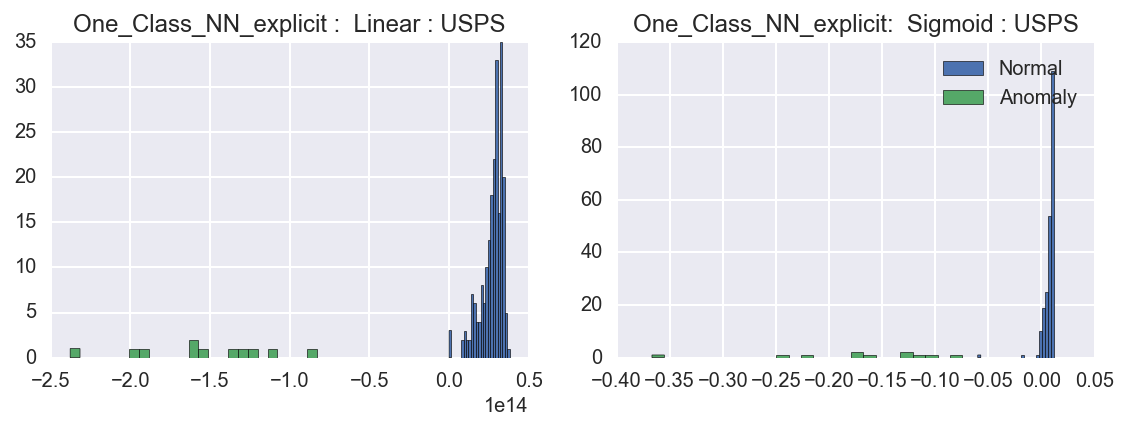

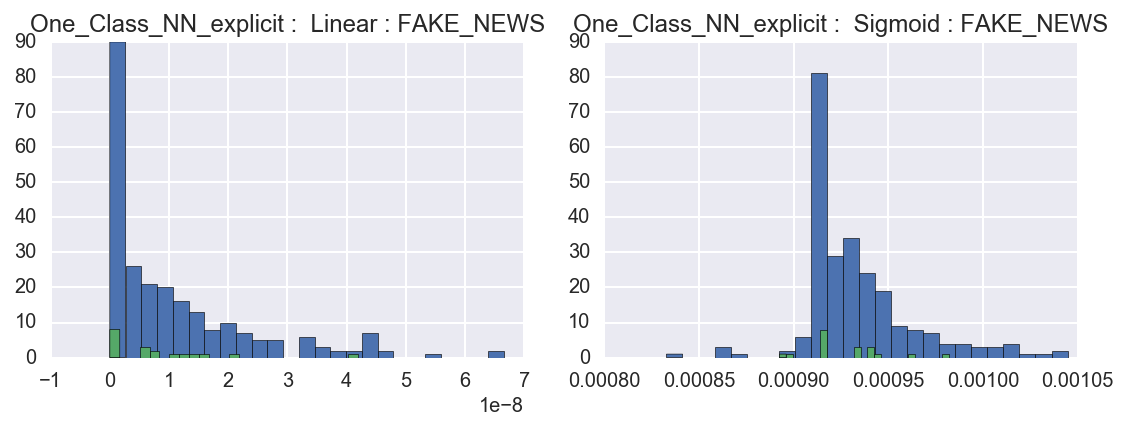

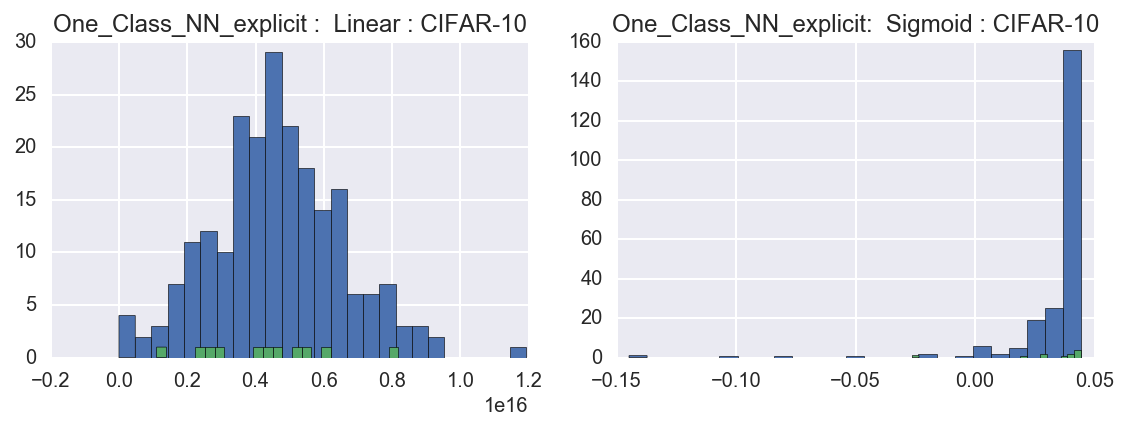

In [5]:
##  Models implemented 
from OneClass_NN_model import func_getDecision_Scores_One_Class_NN_explicit
### PLotting functions for the methods implemented
from OneClass_NN_model_plot_scores import plot_decision_scores_One_Class_NN_explicit


datasets = ["USPS","FAKE_NEWS","SPAM_Vs_HAM","CIFAR-10"]
model = ["sklearn-OCSVM","sklearn-OCSVM-explicit","tensorflow","tflearn"]
activations = ["Linear","Sigmoid"]
methods = ["Linear","rbf"]
dataType = ["Train","Test"]
for data in range(0,len(datasets)):
        [df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores] = func_getDecision_Scores_One_Class_NN_explicit(datasets[data],train_data_list[data],test_data_list[data])
        plot_decision_scores_One_Class_NN_explicit("One_Class_NN_explicit",datasets[data],df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores)
            

## Tensorflow One Class-NN

Epoch = 1, r = 0.250003
Epoch = 2, r = 0.801360
Epoch = 3, r = 1.723956
Epoch = 4, r = 2.686446
Epoch = 5, r = 3.652274
Epoch = 6, r = 4.612071
Epoch = 7, r = 5.563688
Epoch = 8, r = 6.506463
Epoch = 9, r = 7.440176
Epoch = 10, r = 8.364771
Epoch = 11, r = 9.280262
Epoch = 12, r = 10.186694
Epoch = 13, r = 11.084131
Epoch = 14, r = 11.972646
Epoch = 15, r = 12.852317
Epoch = 16, r = 13.723223
Epoch = 17, r = 14.585447
Epoch = 18, r = 15.439071
Epoch = 19, r = 16.284177
Epoch = 20, r = 17.120849
Epoch = 21, r = 17.949168
Epoch = 22, r = 18.769217
Epoch = 23, r = 19.581076
Epoch = 24, r = 20.384828
Epoch = 25, r = 21.180552
Epoch = 26, r = 21.968327
Epoch = 27, r = 22.748232
Epoch = 28, r = 23.520346
Epoch = 29, r = 24.284745
Epoch = 30, r = 25.041506
Epoch = 31, r = 25.790706
Epoch = 32, r = 26.532419
Epoch = 33, r = 27.266721
Epoch = 34, r = 27.993685
Epoch = 35, r = 28.713384
Epoch = 36, r = 29.425891
Epoch = 37, r = 30.131277
Epoch = 38, r = 30.829613
Epoch = 39, r = 31.520970
Epoch 

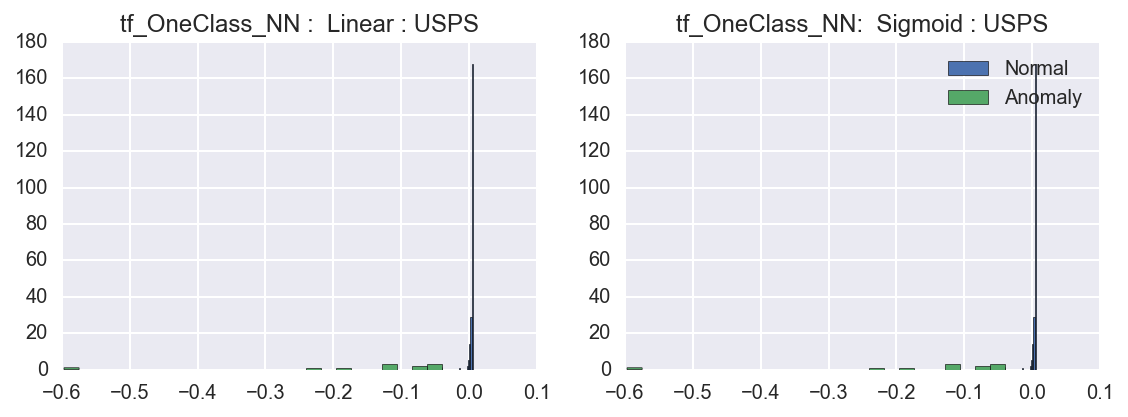

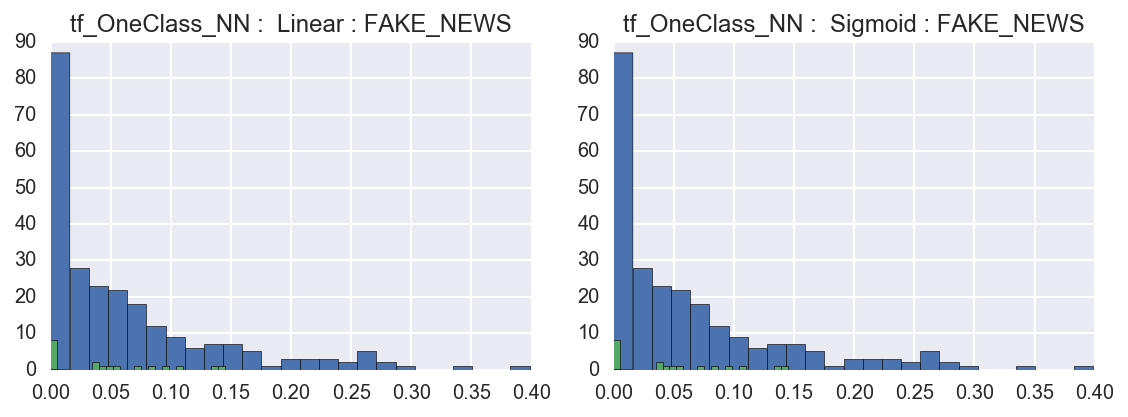

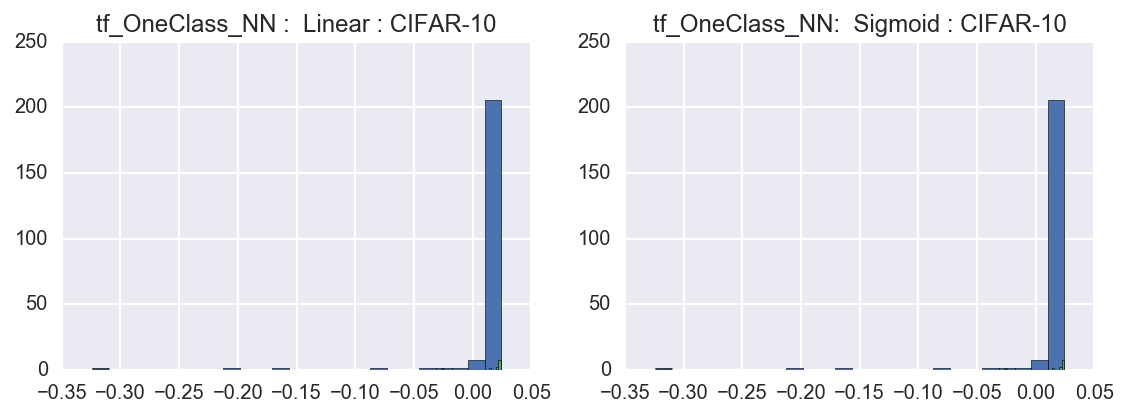

In [3]:
from tf_OneClass_NN_model import func_getDecision_Scores_tf_OneClass_NN

### PLotting functions for the methods implemented
from tf_OneClass_NN_model_plot_scores import plot_decision_scores_tf_One_Class_NN

datasets = ["USPS","FAKE_NEWS","SPAM_Vs_HAM","CIFAR-10"]
model = ["sklearn-OCSVM","sklearn-OCSVM-explicit","tensorflow","tflearn"]
activations = ["Linear","Sigmoid"]
methods = ["Linear","rbf"]
dataType = ["Train","Test"]

for data in range(0,len(datasets)):
        [df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores] = func_getDecision_Scores_tf_OneClass_NN(datasets[data],train_data_list[data],test_data_list[data])
        plot_decision_scores_tf_One_Class_NN("tf_One_Class_NN",datasets[data],df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores)
            

## Tflearn One Class-NN

Training Step: 599  | total loss: 0.00174 | time: 0.007s
| SGD | epoch: 200 | loss: 0.00174 - binary_acc: 1.0000 -- iter: 200/220
Training Step: 600  | total loss: 0.00174 | time: 0.011s
| SGD | epoch: 200 | loss: 0.00174 - binary_acc: 1.0000 -- iter: 220/220
--


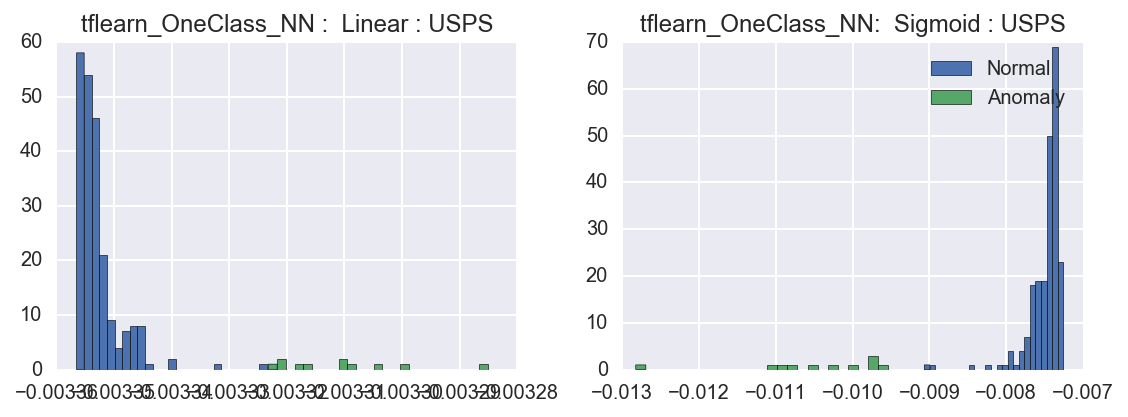

In [3]:
from tflearn_OneClass_NN_model import func_getDecision_Scores_tflearn_OneClass_NN

### PLotting functions for the methods implemented
from tflearn_OneClass_NN_model_plot_scores import plot_decision_scores_tflearn_OneClass_NN

datasets = ["USPS","FAKE_NEWS","SPAM_Vs_HAM","CIFAR-10"]
model = ["sklearn-OCSVM","sklearn-OCSVM-explicit","tensorflow","tflearn"]
activations = ["Linear","Sigmoid"]
methods = ["Linear","rbf"]
dataType = ["Train","Test"]
for data in range(0,len(datasets)):
        [df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores] = func_getDecision_Scores_tflearn_OneClass_NN(datasets[data],train_data_list[data],test_data_list[data],train_labels_list[data])
        plot_decision_scores_tflearn_OneClass_NN("tflearn_OneClass_NN",datasets[data],df_usps_scores,df_fake_news_scores,df_spam_vs_ham_scores,df_cifar_10_scores)
            